In [1]:
import NNMFit
import matplotlib.pyplot as plt


In [2]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})

In [3]:
scan_dir_dict = {
                 "test_range1" : "/data/user/tvaneede/GlobalFit/analysis/toy_km3net/create_dag/output/test_range_icecube_norm1.36_gamma2.37",
                 "test_range2" : "/data/user/tvaneede/GlobalFit/analysis/toy_km3net/create_dag/output/test_range2_icecube_norm1.36_gamma2.37",
                 "icecube" : "/data/user/tvaneede/GlobalFit/analysis/toy_km3net/create_dag/output/test_range3_icecube_norm1.36_gamma2.37",
                 "icecube_km3net" : "/data/user/tvaneede/GlobalFit/analysis/toy_km3net/create_dag/output/icecube_km3net_norm1.36_gamma2.37",
                 "bestfit" : "/data/user/tvaneede/GlobalFit/analysis/toy_km3net/create_dag/output/icecube_km3net_norm0.077_gamma1.54",
                 "bestfit_range2" : "/data/user/tvaneede/GlobalFit/analysis/toy_km3net/create_dag/output/icecube_km3net_norm0.077_gamma1.54_range2",
                 }

In [4]:
drop_unsuccessful = True

scan_dict = {}

x = {}
y = {}
dllh = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = NNMFit.utilities.ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)
    x[name], y[name], dllh[name] = scan_dict[name].get_scan_xydllh(x="astro_norm",y="gamma_astro",interpolate=True, drop_unsuccessful=drop_unsuccessful)

test_range1
test_range2
icecube
icecube_km3net
bestfit
bestfit_range2


/tmp/ipykernel_24019/1559612304.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  cntr = ax.contour( x[name], y[name], dllh[name],


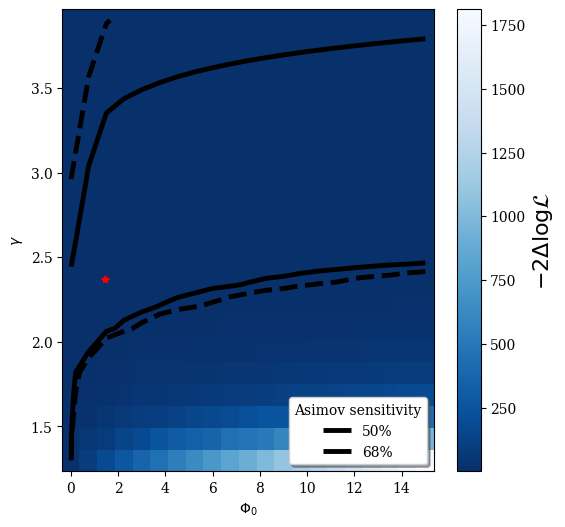

In [5]:
name = "icecube"

levels = [1.39,2.3]  # 50% 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["50%", "68%"]

colors = ["black", "red"]
linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

cntr = ax.contour( x[name], y[name], dllh[name], 
                  levels=levels, colors=colors[0], linewidths=3.5, linestyles = linestyles,
                  label = "sig" )

pcm = ax.pcolor(x[name], 
                y[name], 
                dllh[name],
                cmap='Blues_r', shading='auto')

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(label=r'$-2\Delta\mathrm{log}\mathcal{L}$',size=16,fontfamily='serif')


ax.plot([1.44], [2.37],"*", color="red")

ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

# set the legend
ll, lh = [], []
h, _ = cntr.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

l3 = ax.legend(lh,ll,loc = "lower right", title = "Asimov sensitivity",
                ncols=1,frameon=True,fancybox=True,shadow=True)

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/plots/output/llscan_contour_{name}.pdf")

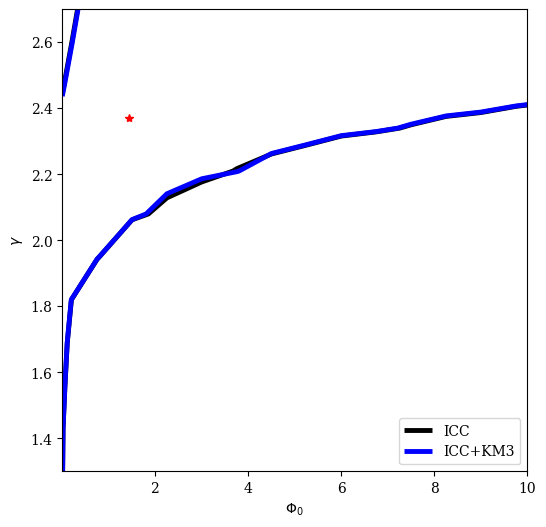

In [ ]:
# compare contours
name1 = "icecube"
name2 = "icecube_km3net"


levels = [1.39]  # 50% 1sigma (68%), 5.99 2sigma (95%)

colors = ["black", "blue"]
linestyles = ["-","--"]

# set the legend
ll, lh = [], []

fig2, (ax2) = plt.subplots(1, 1)

cntr1 = ax2.contour( x[name1], y[name1], dllh[name1], 
                  levels=levels, colors=colors[0], linewidths=3.5, linestyles = linestyles )

h1, _ = cntr1.legend_elements()
lh.append(h1[0]) # legend elements
ll.append(f'ICC') # legend text

cntr2 = ax2.contour( x[name2], y[name2], dllh[name2], 
                  levels=levels, colors=colors[1], linewidths=3.5, linestyles = linestyles )

h2, _ = cntr2.legend_elements()
lh.append(h2[0]) # legend elements
ll.append(f'ICC+KM3') # legend text

ax2.plot([1.44], [2.37],"*", color="red")

ax2.set_xlabel(r"$\Phi_0$")
ax2.set_ylabel(r"$\gamma$")

ax2.set_xlim([0.01,10])
ax2.set_ylim([1.3,2.7])

ax2.legend(lh,ll,loc="lower right")

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/plots/output/compare_contour_{name1}-{name2}.pdf")

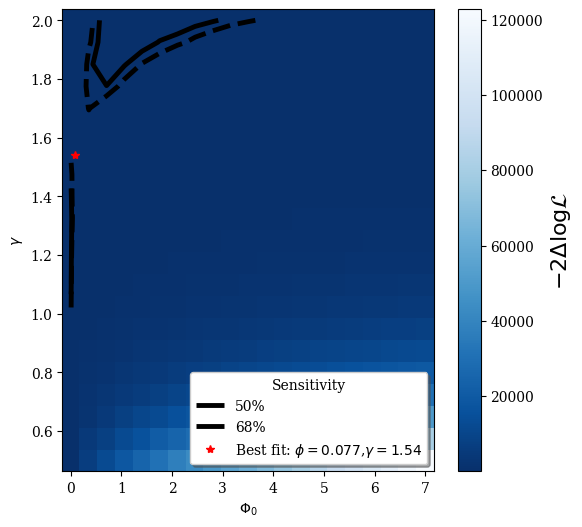

In [ ]:
# best fit with 1 event in KM3NeT

name = "bestfit_range2"

levels = [1.39,2.3]  # 50% 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["50%", "68%"]

colors = ["black", "red"]
linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

cntr = ax.contour( x[name], y[name], dllh[name], 
                  levels=levels, colors=colors[0], linewidths=3.5, linestyles = linestyles )

pcm = ax.pcolor(x[name], 
                y[name], 
                dllh[name],
                cmap='Blues_r', shading='auto')

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(label=r'$-2\Delta\mathrm{log}\mathcal{L}$',size=16,fontfamily='serif')


dot, = ax.plot([0.077], [1.54],"*", color="red")

ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

# set the legend
ll, lh = [], []
h, _ = cntr.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

lh.append(dot)
ll.append(r"Best fit: $\phi=0.077$,$\gamma=1.54$")

l3 = ax.legend(lh,ll,loc = "lower right", title = "Sensitivity",
                ncols=1,frameon=True,fancybox=True,shadow=True)

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/plots/output/llscan_contour_{name}.pdf")

import best fit contours from the global fit

In [8]:
import pandas as pd

In [22]:
pickles = {}

for name, pickle_file_path in fit_res_dir_dict.items():
    print(name)
    pickles[name] = pd.read_pickle(pickle_file_path)
    print( "norm", pickles[name]["fit-result"][1]["astro_norm"],
           "gamma",pickles[name]["fit-result"][1]["gamma_astro"])

track_SAY
norm 1.748063675275883 gamma 2.4396809047605923
track_cscd_nohybrid_SAY
norm 1.7755788207862448 gamma 2.526882998487011
track_cscd_SAY
norm 1.8669074110142572 gamma 2.5116981298688543


In [49]:
scan_dir_dict = {
                 "track" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track",
                 }

In [50]:
drop_unsuccessful = False

scan_dict = {}

x = {}
y = {}
dllh = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = NNMFit.utilities.ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)
    x[name], y[name], dllh[name] = scan_dict[name].get_scan_xydllh(x="astro_norm",y="gamma_astro",interpolate=True, drop_unsuccessful=drop_unsuccessful)

track


/tmp/ipykernel_24019/3866015655.py:21: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pcm, ax=ax)
/tmp/ipykernel_24019/3866015655.py:21: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pcm, ax=ax)


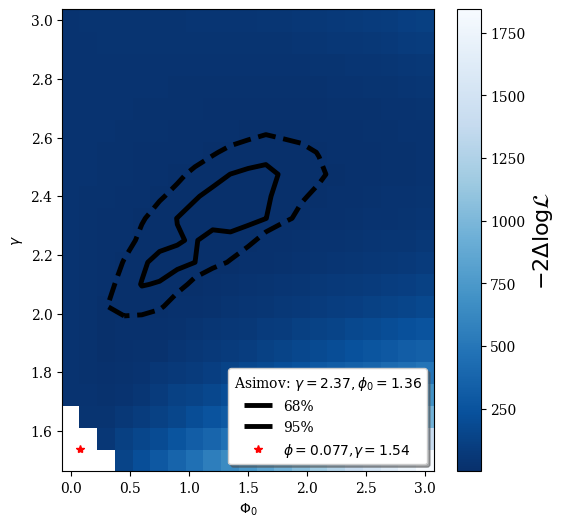

In [61]:
levels = [2.3,5.99]  # 50% 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%", "95%"]

colors = ["black", "red", "blue", "green"]
linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

ll, lh = [], []

name = "track"

cntr = ax.contour( x[name], y[name], dllh[name], 
                  levels=levels, colors=colors[0], linewidths=3.5, linestyles = linestyles )

pcm = ax.pcolor(x[name], 
                y[name], 
                dllh[name],
                cmap='Blues_r', shading='auto')

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(label=r'$-2\Delta\mathrm{log}\mathcal{L}$',size=16,fontfamily='serif')

dot, = ax.plot([0.077], [1.54],"*", color="red")


# set the legend
ll, lh = [], []
h, _ = cntr.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

lh.append(dot)
ll.append(r"$\phi=0.077$,$\gamma=1.54$")


ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

l3 = ax.legend(lh,ll,loc = "lower right", title = r"Asimov: $\gamma=2.37,\phi_0=1.36$",
                ncols=1,frameon=True,fancybox=True,shadow=True)

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/plots/output/compare_best_fit_with_track_contour.pdf")